# Proyek Akhir: Menyelesaikan Permasalahan Perusahaan Edutech

- Nama: MUH. FADHLUR ROHMAN
- Email: muhammadfadhlur8@gmail.com
- Id Dicoding: muhfadhlurrohmanroot123

## Persiapan

### Menyiapkan library yang dibutuhkan

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from skopt import BayesSearchCV
from skopt.space import Integer, Real
import joblib

### Menyiapkan data yang akan diguankan

In [3]:
df = pd.read_csv('https://github.com/dicodingacademy/dicoding_dataset/blob/main/students_performance/data.csv?raw=true', sep=';')
df

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,9773,1,1,125.0,1,1,1,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,1,1,2,9773,1,1,120.0,105,1,1,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,1,1,1,9500,1,1,154.0,1,37,37,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,1,1,1,9147,1,1,180.0,1,37,37,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate


In [34]:
df['Marital_status'].value_counts()

Marital_status
1    3919
2     379
4      91
5      25
6       6
3       4
Name: count, dtype: int64

In [ ]:
# Display columns names and sort them
print("Columns in the dataset:")
sorted(df.columns)

Columns in the dataset:


['Admission_grade',
 'Age_at_enrollment',
 'Application_mode',
 'Application_order',
 'Course',
 'Curricular_units_1st_sem_approved',
 'Curricular_units_1st_sem_credited',
 'Curricular_units_1st_sem_enrolled',
 'Curricular_units_1st_sem_evaluations',
 'Curricular_units_1st_sem_grade',
 'Curricular_units_1st_sem_without_evaluations',
 'Curricular_units_2nd_sem_approved',
 'Curricular_units_2nd_sem_credited',
 'Curricular_units_2nd_sem_enrolled',
 'Curricular_units_2nd_sem_evaluations',
 'Curricular_units_2nd_sem_grade',
 'Curricular_units_2nd_sem_without_evaluations',
 'Daytime_evening_attendance',
 'Debtor',
 'Displaced',
 'Educational_special_needs',
 'Fathers_occupation',
 'Fathers_qualification',
 'GDP',
 'Gender',
 'Inflation_rate',
 'International',
 'Marital_status',
 'Mothers_occupation',
 'Mothers_qualification',
 'Nacionality',
 'Previous_qualification',
 'Previous_qualification_grade',
 'Scholarship_holder',
 'Status',
 'Tuition_fees_up_to_date',
 'Unemployment_rate']

## Data Understanding

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   int64  
 1   Application_mode                              4424 non-null   int64  
 2   Application_order                             4424 non-null   int64  
 3   Course                                        4424 non-null   int64  
 4   Daytime_evening_attendance                    4424 non-null   int64  
 5   Previous_qualification                        4424 non-null   int64  
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nacionality                                   4424 non-null   int64  
 8   Mothers_qualification                         4424 non-null   int64  
 9   Fathers_qualification                         4424 non-null   i

In [31]:
df.isnull().sum()

Marital_status                                  0
Application_mode                                0
Application_order                               0
Course                                          0
Daytime_evening_attendance                      0
Previous_qualification                          0
Previous_qualification_grade                    0
Nacionality                                     0
Mothers_qualification                           0
Fathers_qualification                           0
Mothers_occupation                              0
Fathers_occupation                              0
Admission_grade                                 0
Displaced                                       0
Educational_special_needs                       0
Debtor                                          0
Tuition_fees_up_to_date                         0
Gender                                          0
Scholarship_holder                              0
Age_at_enrollment                               0


In [32]:
df['Status'].value_counts()

Status
Graduate    2209
Dropout     1421
Enrolled     794
Name: count, dtype: int64

### Exploratory Data Analysis

- Distribusi Status

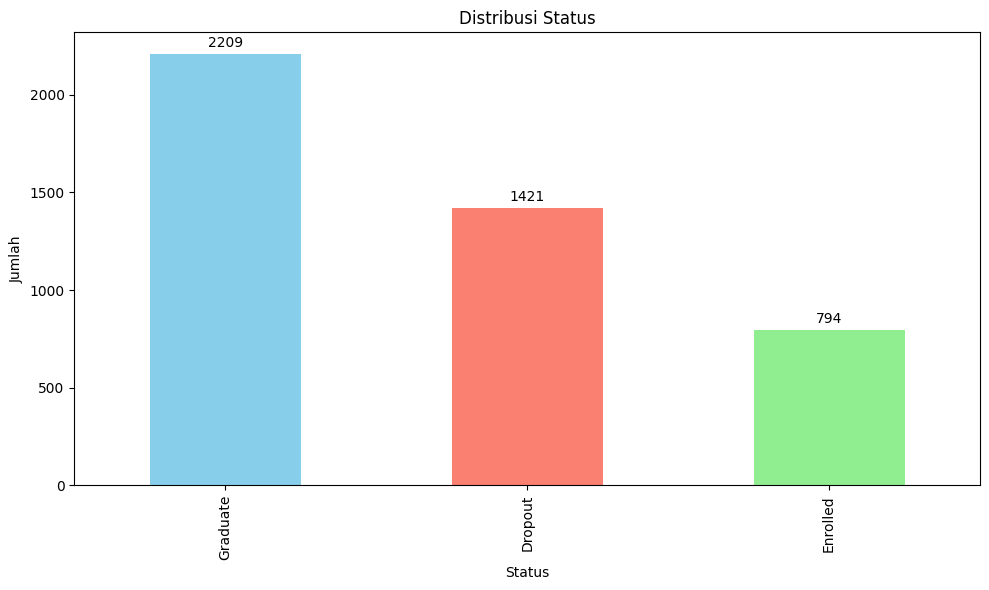

In [33]:
fig, ax = plt.subplots(figsize=(10, 6))
df['Status'].value_counts().plot(kind='bar', color=['skyblue', 'salmon', 'lightgreen'], ax=ax)
ax.set_title('Distribusi Status')
ax.set_xlabel('Status')
ax.set_ylabel('Jumlah')

for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=10, padding=3)

plt.tight_layout()
plt.show()

- Distribusi Status berdasarkan Kursus yang diambil oleh siswa

In [34]:
course = {
    33: 'Biofuel Production Technologies',
    171: 'Animation and Multimedia Design',
    8014: 'Social Service (evening attendance)',
    9003: 'Agronomy',
    9070: 'Communication Design',
    9085: 'Veterinary Nursing',
    9119: 'Informatics Engineering',
    9130: 'Equinculture',
    9147: 'Management',
    9238: 'Social Service',
    9254: 'Tourism',
    9500: 'Nursing',
    9556: 'Oral Hygiene',
    9670: 'Advertising and Marketing Management',
    9773: 'Journalism and Communication',
    9853: 'Basic Education',
    9991: 'Management (evening attendance)'
}
print(list(course.keys()))
print(list(course.values()))

[33, 171, 8014, 9003, 9070, 9085, 9119, 9130, 9147, 9238, 9254, 9500, 9556, 9670, 9773, 9853, 9991]
['Biofuel Production Technologies', 'Animation and Multimedia Design', 'Social Service (evening attendance)', 'Agronomy', 'Communication Design', 'Veterinary Nursing', 'Informatics Engineering', 'Equinculture', 'Management', 'Social Service', 'Tourism', 'Nursing', 'Oral Hygiene', 'Advertising and Marketing Management', 'Journalism and Communication', 'Basic Education', 'Management (evening attendance)']


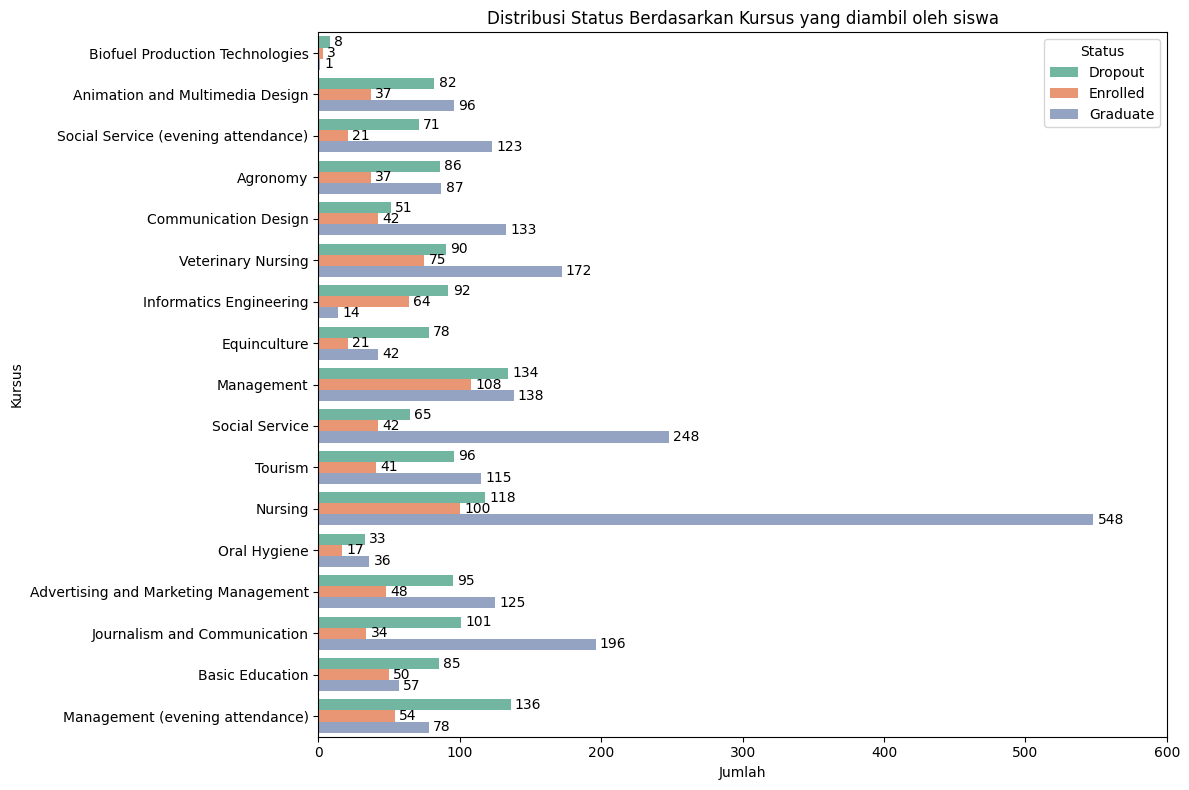

In [35]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.countplot(data=df, y='Course', hue='Status', palette='Set2', ax=ax)
ax.set_title('Distribusi Status Berdasarkan Kursus yang diambil oleh siswa')
ax.set_xlabel('Jumlah')
ax.set_ylabel('Kursus')
ax.set_yticks(range(len(course)))
ax.set_yticklabels(list(course.values()))
ax.set_xlim(0, 600)

for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=10, padding=3, rotation=0)

plt.tight_layout()
plt.show()

- Distribusi Status berdasarkan Gender

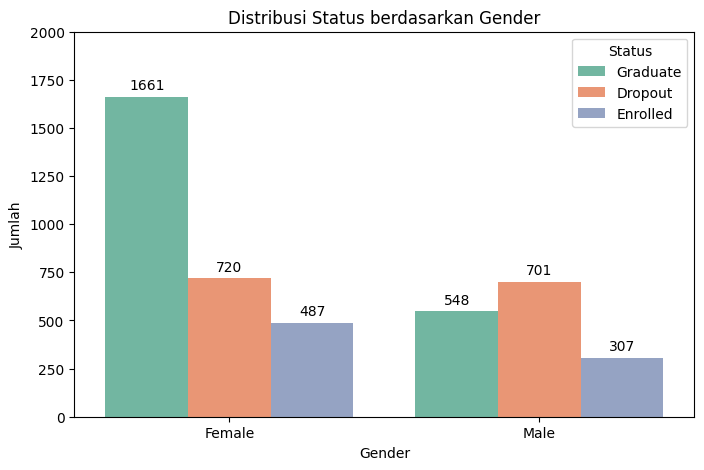

In [36]:
fig, ax = plt.subplots(figsize=(8, 5))
sns.countplot(data=df, x='Gender', hue='Status', palette='Set2', ax=ax)
ax.set_xticks([0, 1])
ax.set_xticklabels(['Female', 'Male'])
ax.set_title('Distribusi Status berdasarkan Gender')
ax.set_xlabel('Gender')
ax.set_ylabel('Jumlah')
ax.set_ylim(0, 2000)

for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=10, padding=3)

plt.legend(title='Status')
plt.show()

- Distribusi Status berdasarkan Status Perkawinan

In [37]:
marital_status = ['Lajang', 'Menikah', 'Duda', 'Janda', 'Hidup Bersama', 'Terpisah Secara Hukum']

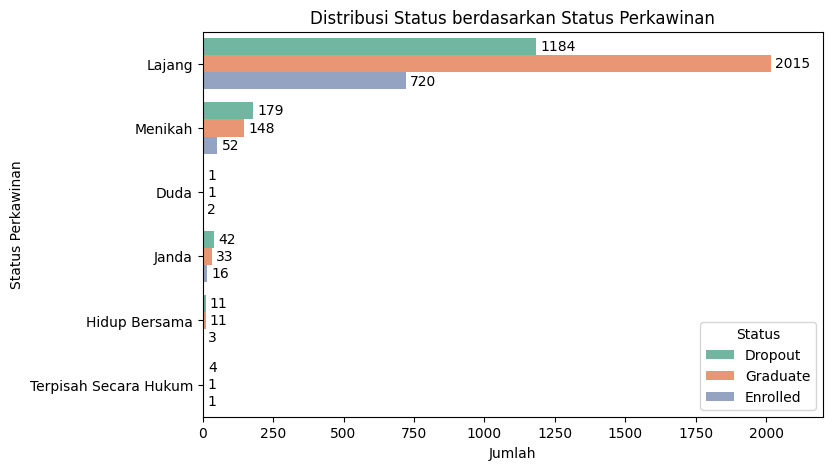

In [38]:
fig, ax = plt.subplots(figsize=(8, 5))
sns.countplot(data=df, y='Marital_status', hue='Status', palette='Set2', ax=ax)
ax.set_title('Distribusi Status berdasarkan Status Perkawinan')
ax.set_xlabel('Jumlah')
ax.set_ylabel('Status Perkawinan')
ax.set_yticks(range(len(marital_status)))
ax.set_yticklabels(marital_status)
ax.set_xlim(0, 2200)
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=10, padding=3)
plt.legend(title='Status')
plt.show()

- Distribusi Status berdasarkan Berkebutuhan Khusus

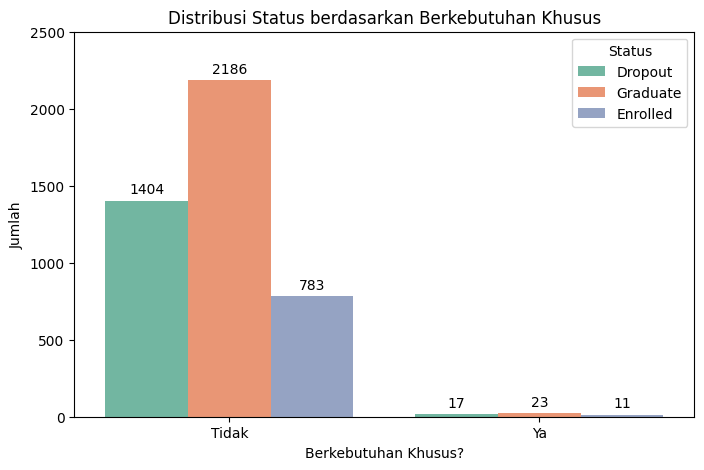

In [39]:
fig, ax = plt.subplots(figsize=(8, 5))
sns.countplot(data=df, x='Educational_special_needs', hue='Status', palette='Set2', ax=ax)
ax.set_title('Distribusi Status berdasarkan Berkebutuhan Khusus')
ax.set_xlabel('Berkebutuhan Khusus?')
ax.set_ylabel('Jumlah')
ax.set_ylim(0, 2500)
ax.set_xticks([0, 1])
ax.set_xticklabels(['Tidak', 'Ya'])
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=10, padding=3, rotation=0)
plt.legend(title='Status')
plt.show()

- Distribusi Status berdasarkan Orang Terlantar

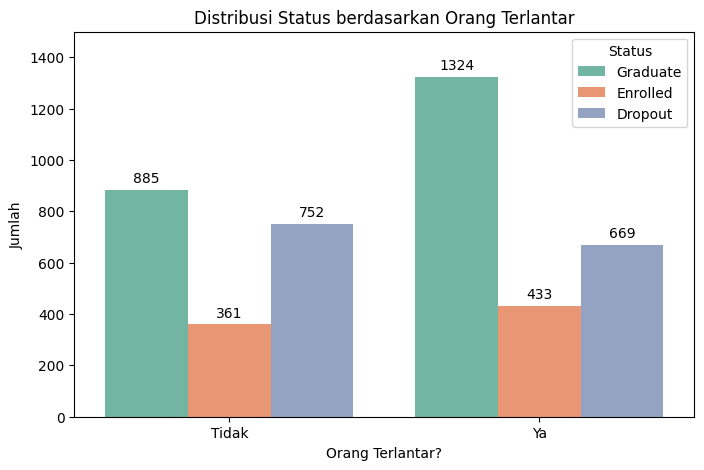

In [40]:
fig, ax = plt.subplots(figsize=(8, 5))
sns.countplot(data=df, x='Displaced', hue='Status', palette='Set2', ax=ax)
ax.set_title('Distribusi Status berdasarkan Orang Terlantar')
ax.set_xlabel('Orang Terlantar?')
ax.set_ylabel('Jumlah')
ax.set_ylim(0, 1500)
ax.set_xticks([0, 1])
ax.set_xticklabels(['Tidak', 'Ya'])
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=10, padding=3, rotation=0)
plt.legend(title='Status')
plt.show()

## Data Preparation / Preprocessing

In [41]:
df_encoded = df.copy()
label_encoder = LabelEncoder()
df_encoded['Status'] = label_encoder.fit_transform(df_encoded['Status'])
df_encoded['Status'].value_counts()

Status
2    2209
0    1421
1     794
Name: count, dtype: int64

In [42]:
# Memisahkan fitur dan target
X = df_encoded.drop('Status', axis=1)
y = df_encoded['Status']

# Split data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

## Modeling

In [43]:
# Definisikan ruang pencarian hyperparameter
param_space = {
    'n_estimators': Integer(50, 300),
    'max_depth': Integer(3, 20),
    'min_samples_split': Integer(2, 20),
    'min_samples_leaf': Integer(1, 20),
    'max_features': Real(0.3, 1.0, prior='uniform')
}

# Inisialisasi model RandomForestClassifier
rf = RandomForestClassifier(random_state=42)

# Setup BayesSearchCV
opt = BayesSearchCV(
    estimator=rf,
    search_spaces=param_space,
    n_iter=32,
    cv=3,
    n_jobs=-1,
    scoring='accuracy',
    random_state=42
)

# Jalankan optimisasi
opt.fit(X_train, y_train)

print("Best Parameters:", opt.best_params_)
print("Best CV Score:", opt.best_score_)

Best Parameters: OrderedDict([('max_depth', 20), ('max_features', 0.315891002079297), ('min_samples_leaf', 1), ('min_samples_split', 17), ('n_estimators', 246)])
Best CV Score: 0.7677331167368688


In [44]:
model = RandomForestClassifier(**opt.best_params_, random_state=42)
model.fit(X_train, y_train)

,n_estimators,246
,criterion,'gini'
,max_depth,20
,min_samples_split,17
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,0.315891002079297
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


## Evaluation

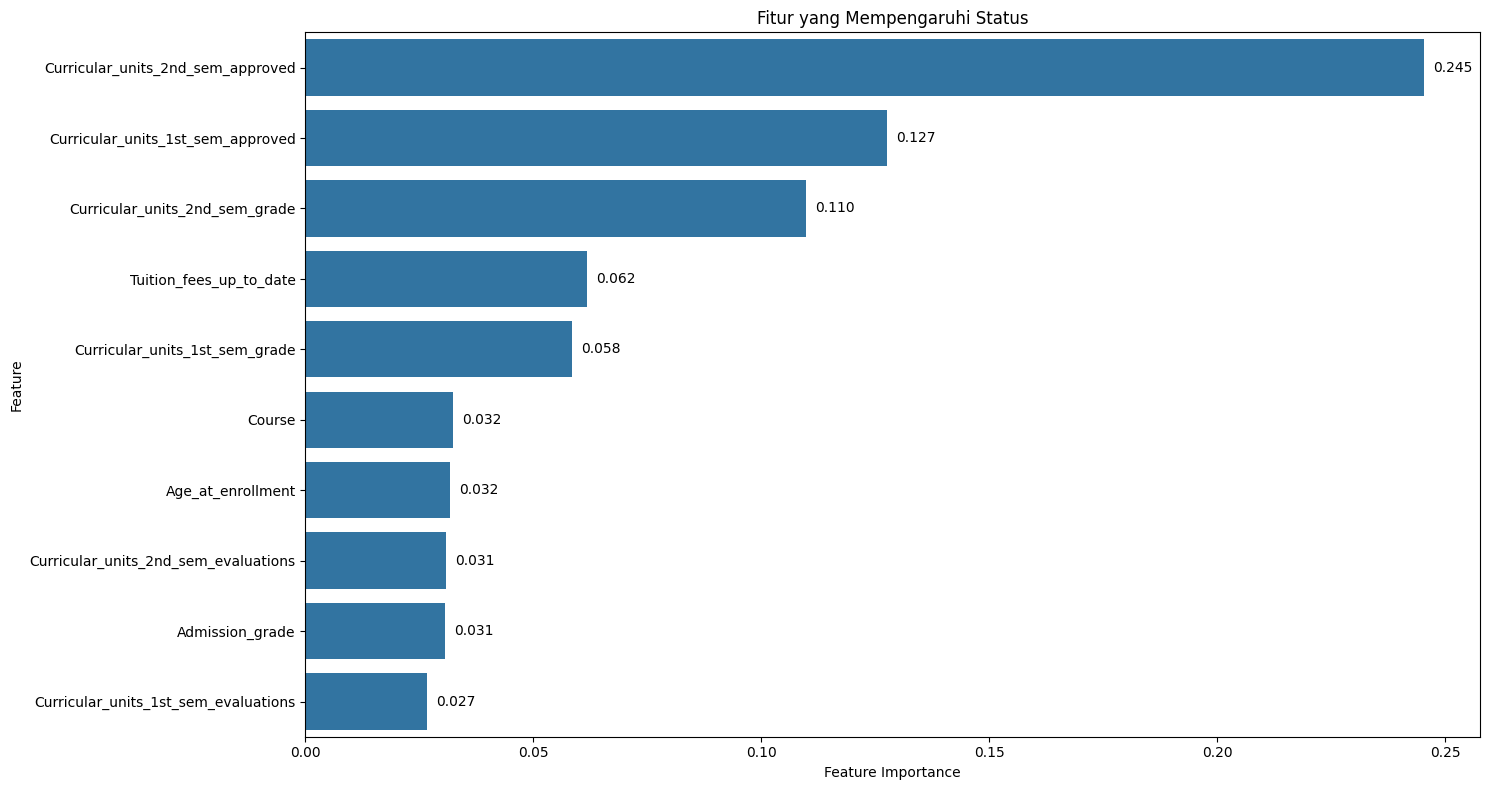

In [45]:
importances = model.feature_importances_
feature_names = X.columns
feat_imp = pd.Series(importances, index=feature_names).sort_values(ascending=False)

fig, ax = plt.subplots(figsize=(15, 8))
sns.barplot(x=feat_imp.head(10).values, y=feat_imp.head(10).index, ax=ax)
ax.set_title("Fitur yang Mempengaruhi Status")
ax.set_xlabel("Feature Importance")
ax.set_ylabel("Feature")

for i, v in enumerate(feat_imp.head(10).values):
    ax.text(v + 0.002, i, f"{v:.3f}", va='center')

plt.tight_layout()
plt.savefig('./assets/feature_importance.png', dpi=300, bbox_inches='tight')
plt.show()

In [46]:
y_pred = model.predict(X_test)

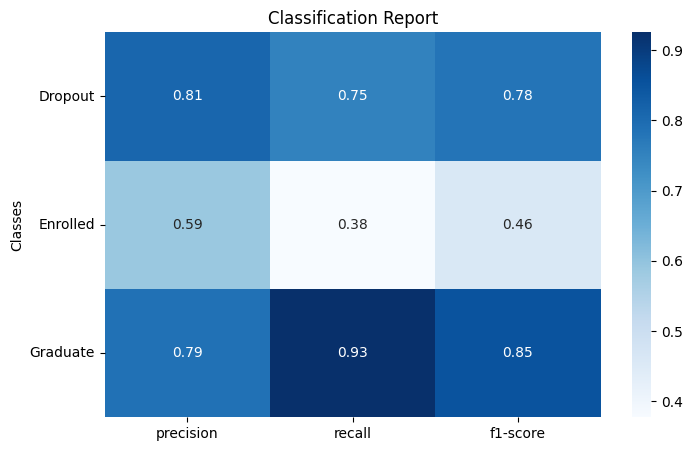

In [47]:
# Generate classification report as a dictionary
report_dict = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report_dict).transpose()

# Select only classes (exclude accuracy, macro avg, weighted avg)
class_labels = [str(i) for i in range(len(label_encoder.classes_))]
class_report_df = report_df.loc[class_labels]

fig, ax = plt.subplots(figsize=(8, 5))
sns.heatmap(class_report_df[['precision', 'recall', 'f1-score']], annot=True, cmap='Blues', fmt=".2f", ax=ax, yticklabels=label_encoder.classes_)
ax.set_title('Classification Report')
ax.set_ylabel('Classes')
plt.yticks(rotation=0)
plt.show()

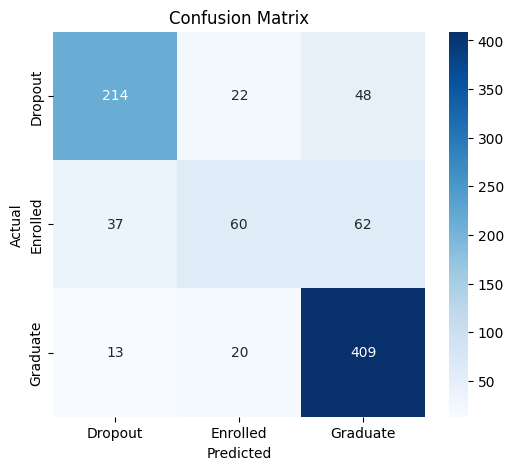

In [48]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [49]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.77


In [50]:
# Save the model to a file
joblib.dump(model, './model/model.joblib')
# Save the label encoder to a file
joblib.dump(label_encoder, './model/label_encoder.joblib')

['./model/label_encoder.joblib']